Análise de Dados de atendimentos de suporte

In [1]:
# Importação das bibliotecas	
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando o dataset
df = pd.read_csv('datasets/tech_support_dataset.csv')

In [3]:
df.head()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92 minutes,Software,Pending
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76 minutes,Account,Pending
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50 minutes,Network,Resolved
3,CONV-0004,Forgot password,Reset your password using the link provided.,97 minutes,Performance,Pending
4,CONV-0005,Software installation failure,Follow the software installation guide.,110 minutes,Performance,Pending


In [4]:
# Verificando o tamanho do dataset
print(f'Quantidade de colunas; {df.shape[1]}, Quantidade de linhas: {df.shape[0]}')

Quantidade de colunas; 6, Quantidade de linhas: 1896


In [ ]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Conversation_ID  1896 non-null   object
 1   Customer_Issue   1896 non-null   object
 2   Tech_Response    1896 non-null   object
 3   Resolution_Time  1896 non-null   object
 4   Issue_Category   1896 non-null   object
 5   Issue_Status     1896 non-null   object
dtypes: object(6)
memory usage: 89.0+ KB


Nesse passo extraimos os dados da coluna Duration_Time e criamos uma coluna apenas com os minutos em inteiro

In [6]:
# Criação da coluna de minutos
df['Duration_minutes'] = df['Resolution_Time'].str.replace('minutes','').astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Conversation_ID   1896 non-null   object
 1   Customer_Issue    1896 non-null   object
 2   Tech_Response     1896 non-null   object
 3   Resolution_Time   1896 non-null   object
 4   Issue_Category    1896 non-null   object
 5   Issue_Status      1896 non-null   object
 6   Duration_minutes  1896 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 103.8+ KB


Para facilitar a análise, criamos uma coluna com a duração em segundos, usada posteriormente para cálculo de média de tempo de resolução

In [70]:
df['Duration_Seconds'] = df['Duration_minutes'] * 60

In [9]:
df.head()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status,Duration_minutes,Duration_Seconds
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92 minutes,Software,Pending,92,5520
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76 minutes,Account,Pending,76,4560
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50 minutes,Network,Resolved,50,3000
3,CONV-0004,Forgot password,Reset your password using the link provided.,97 minutes,Performance,Pending,97,5820
4,CONV-0005,Software installation failure,Follow the software installation guide.,110 minutes,Performance,Pending,110,6600


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Conversation_ID   1896 non-null   object
 1   Customer_Issue    1896 non-null   object
 2   Tech_Response     1896 non-null   object
 3   Resolution_Time   1896 non-null   object
 4   Issue_Category    1896 non-null   object
 5   Issue_Status      1896 non-null   object
 6   Duration_minutes  1896 non-null   int64 
 7   Duration_Seconds  1896 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 118.6+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Conversation_ID   1896 non-null   object
 1   Customer_Issue    1896 non-null   object
 2   Tech_Response     1896 non-null   object
 3   Resolution_Time   1896 non-null   object
 4   Issue_Category    1896 non-null   object
 5   Issue_Status      1896 non-null   object
 6   Duration_minutes  1896 non-null   int64 
 7   Duration_Seconds  1896 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 118.6+ KB


In [12]:
df.head()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status,Duration_minutes,Duration_Seconds
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92 minutes,Software,Pending,92,5520
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76 minutes,Account,Pending,76,4560
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50 minutes,Network,Resolved,50,3000
3,CONV-0004,Forgot password,Reset your password using the link provided.,97 minutes,Performance,Pending,97,5820
4,CONV-0005,Software installation failure,Follow the software installation guide.,110 minutes,Performance,Pending,110,6600


Procuramos no dataset quais são os status disponíveis que podemos usar para análise

In [13]:
df['Issue_Status'].value_counts()

Issue_Status
Resolved                    505
Pending                     478
Resolved after follow-up    472
Escalated                   441
Name: count, dtype: int64

verificamos quais são as categorias que possuimos na base de dados

In [14]:
df['Issue_Category'].value_counts()

Issue_Category
Hardware       402
Performance    381
Network        378
Software       372
Account        363
Name: count, dtype: int64

In [71]:
# Função para impressão de gráfico de barras
def fCountPlot(status):
    fig, ax = plt.subplots(figsize=(10,6))

    sns.countplot(data=df, x=df['Issue_Category'].loc[df['Issue_Status'] == status].sort_values(), ax=ax)
    ax.set_title('Quantidade de chamados por categoria - '+ status)
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Total')
    ax.bar_label(ax.containers[0])
    plt.show()    

In [63]:
df_pending = df.loc[df['Issue_Status'] == 'Pending']
df_Resolved = df.loc[df['Issue_Status'] == 'Resolved']
df_Resolves_Follow_Up = df.loc[df['Issue_Status'] == 'Resolved after follow-up']
df_Escalated = df.loc[df['Issue_Status'] == 'Escalated']

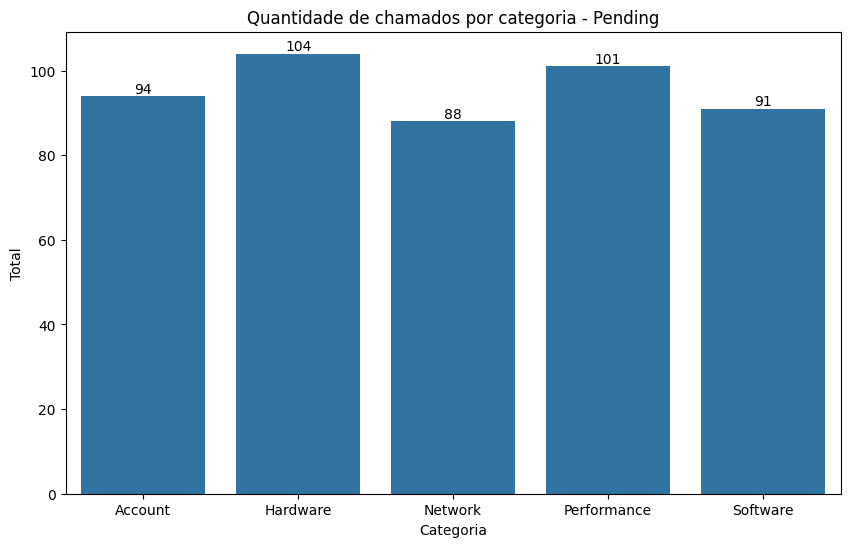

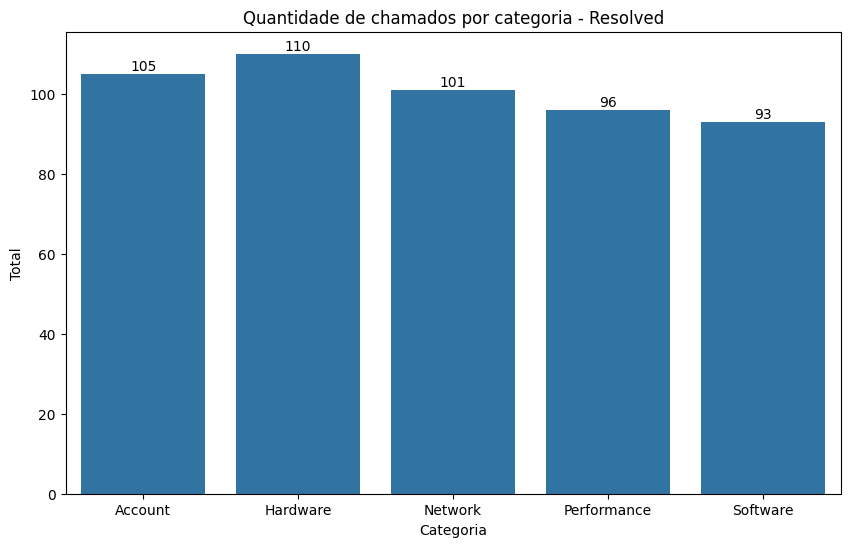

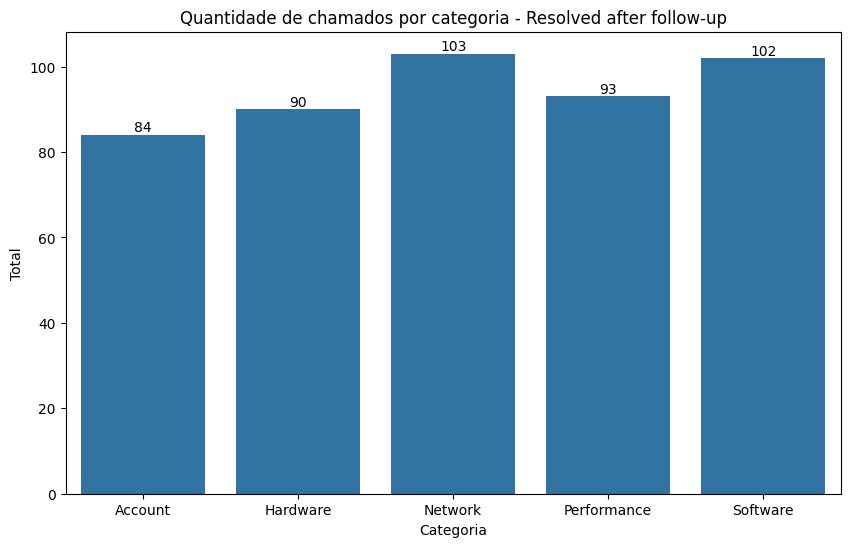

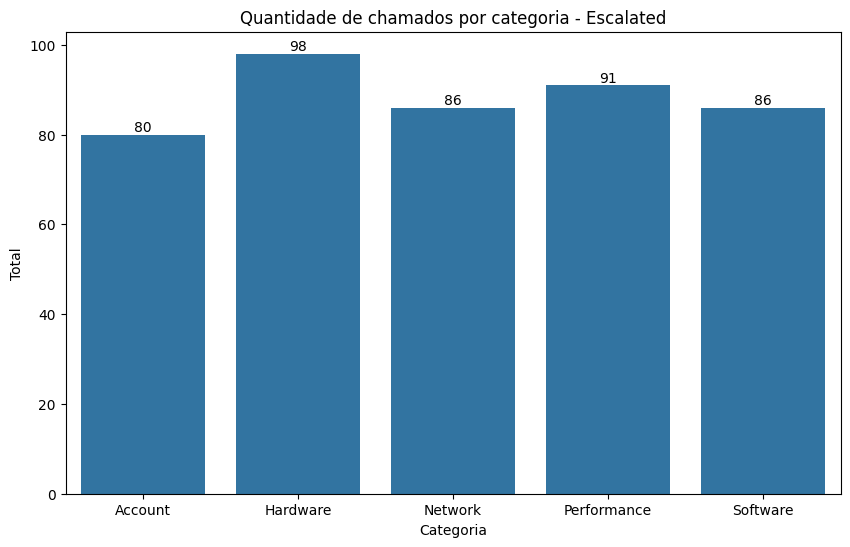

In [72]:
lStatus = df['Issue_Status'].unique()

for status in lStatus:
    fCountPlot(status)

Verificando os gráficos anteriormente apresentados, podemos ver que os as categorias de problemas mais atendidas pelo suporte são de Hardware, Network e performance. Levando essas informações em consideração, podemos sugerir que haja uma atenção para problemas dessas categorias, podendo ser feita a análise dos problemas mais recorrentes por categoria e identificar o motivo de tal fluxo para que possam ser feitos treinamentos ou supervisões sobre os mesmos.

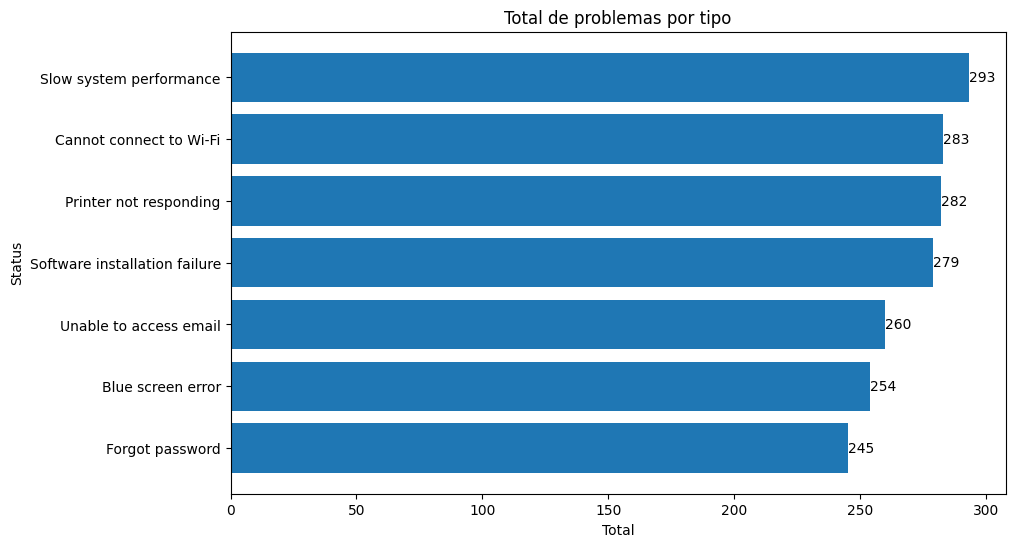

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

plt.barh(df['Customer_Issue'].value_counts().sort_values().index, df['Customer_Issue'].value_counts().sort_values().values)

plt.title('Total de problemas por tipo')
plt.ylabel('Status')
plt.xlabel('Total')
ax.bar_label(ax.containers[0])

plt.show()

No gráfico anterior vemos que o problema mais recorrente é a performance do sistema, isso pode indicar que haja realmente uma lentidão no código, ou um SQL mal otimizado ou até mesmo o hardware do usuário não é adequado para o uso do sistema. Cabe uma investigação mais detalhada para identificar a causa desses chamados, podenso haver revisão de códigos e SQLs além de questionamentos ao usuário sobre as configurações de sua máquina.

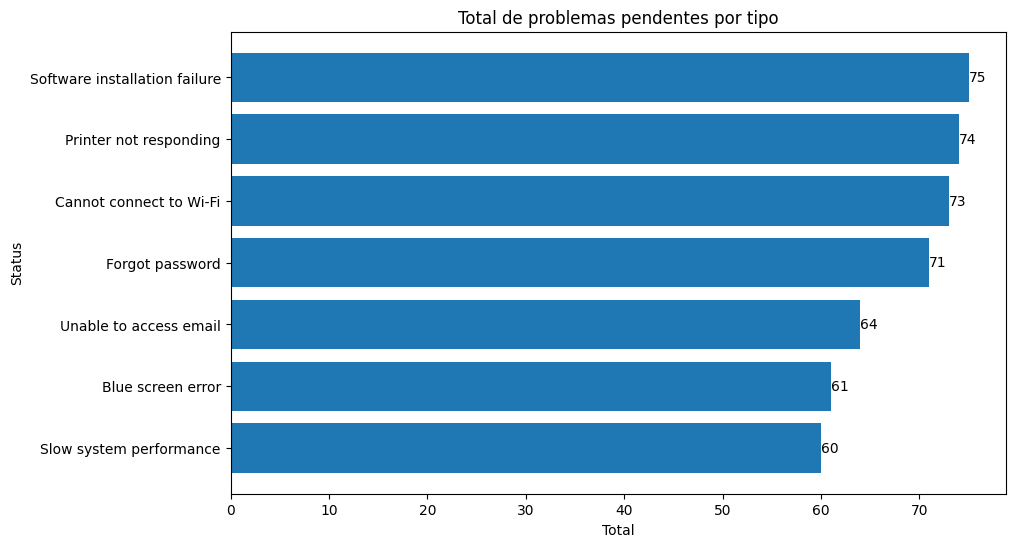

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

plt.barh(df_pending['Customer_Issue'].value_counts().sort_values().index, df_pending['Customer_Issue'].value_counts().sort_values().values)

plt.title('Total de problemas pendentes por tipo')
plt.ylabel('Status')
plt.xlabel('Total')
ax.bar_label(ax.containers[0])

plt.show()

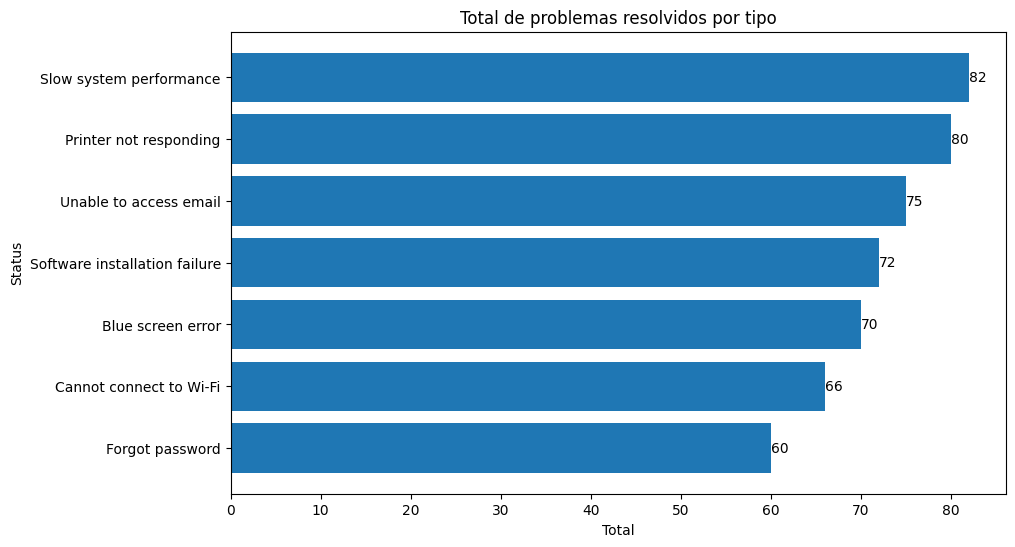

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

plt.barh(df_Resolved['Customer_Issue'].value_counts().sort_values().index, df_Resolved['Customer_Issue'].value_counts().sort_values().values)

plt.title('Total de problemas resolvidos por tipo')
plt.ylabel('Status')
plt.xlabel('Total')
ax.bar_label(ax.containers[0])

plt.show()

In [37]:
df_mean_issue = df.groupby('Customer_Issue')['Duration_Seconds'].mean().sort_values(ascending=False).to_frame().reset_index()
df_mean_issue['Mean_Time'] = pd.to_datetime(df_mean_issue['Duration_Seconds'], unit='s').dt.strftime('%H:%M:%S')
df_mean_issue[['Customer_Issue','Mean_Time']].sort_values(by='Mean_Time', ascending=False)

,Customer_Issue,Mean_Time
0,Printer not responding,01:04:51
1,Unable to access email,01:04:34
2,Blue screen error,01:04:08
3,Forgot password,01:02:48
4,Slow system performance,01:02:48
5,Software installation failure,01:01:21
6,Cannot connect to Wi-Fi,01:00:47


Na tabela anterior vemos a média de tempo investido por problema, se percebe um grande consumo de tempo em problemas de hardware(impressora não respondendo e tela azul) além de problemas de acesso. Para mitigar o consumo de tempo e aumentar a agilidade do atendimento podem ser aderidos a prática de criação de helps para consulta quando há algum desses problemas.

In [38]:
df_mean_Category = df.groupby('Issue_Category')['Duration_Seconds'].mean().sort_values(ascending=False).to_frame().reset_index()
df_mean_Category['Mean_Time'] = pd.to_datetime(df_mean_Category['Duration_Seconds'], unit='s').dt.strftime('%H:%M:%S')
df_mean_Category[['Issue_Category','Mean_Time']].sort_values(by='Mean_Time', ascending=False)

,Issue_Category,Mean_Time
0,Network,01:05:15
1,Account,01:03:16
2,Hardware,01:02:47
3,Performance,01:02:36
4,Software,01:01:09


Já na tabela de categoria, vemos que a média de tempo gasto na solução de problemas de rede está no topo, essa média de tempo de atendimento pode ser referido a alguma instabilidade na rede do cliente, caber a verificação mais a fundo.